In [2]:
# import pandas as pd
# import os
# import glob
# import concurrent.futures
# import time

# directory = 'C:\\Users\\minhtriet.pham\\Desktop\\Data Invoice\\NAM 2023\\Month 3'
# directory2 = 'C:\\Users\\minhtriet.pham\\Desktop\\Data Invoice\\NAM 2023\\Month 3'
# cate_dir = 'C:\\Users\\minhtriet.pham\\Desktop\\DataCate.xlsx'
# cate_dir2 = 'C:\\Users\\minhtriet.pham\\Desktop\\DataCate.xlsx'

# # list of Excel files to read data from
# if os.path.exists(os.path.join(directory, '230301 Payment Summary - 2023-03-02T084245.428.xlsx')):
#     excel_files = glob.glob(os.path.join(directory, '*.xlsx'))
# else:
#     excel_files = glob.glob(os.path.join(directory2, '*.xlsx'))
# try:
#     # # use cols 0, Barcode; 2, Category Name
#     # df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,2])
#     # use cols 0, Barcode; 3, SubCategory Name
#     df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,3])
#     pass
# except FileNotFoundError:
#     # df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,2])
#     # use cols 0, Barcode; 3, SubCategory Name
#     df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,3])
#     pass
# # create an empty list to store the dataframes
# # dfs = [] sho

# outputfile =  'dataM3.csv'
# # def excel2csv
# def excel2csv(inputfile, outputfile):
    
#     # Check if exist file_path
#     if not os.path.exists(outputfile):
#         with open(outputfile, 'w') as f:
#             pass

#     # Read the first line of the file
#     with open(outputfile, 'r') as f:
#         first_line = f.readline().strip()
#     # Check if the first line contains the expected column names
#     has_headers = 'InvoiceID' in first_line
#     df = pd.read_excel(inputfile, sheet_name='Sheet2', skiprows=2, usecols=[4,7,8,14])
#     # df2 Category
#     # # merge with Category, on "Barcode"
#     # df = df.merge(df2, on='Barcode', how='left')
#     # merge with Sub Category, on "Barcode"
#     df = df.merge(df2, on='Barcode', how='left')
    
#     # Check if the first line contains the expected column names
#     df.to_csv(outputfile, mode='a', header= not has_headers, index=False)


# # loop through the list of Excel files
# with concurrent.futures.ThreadPoolExecutor() as executor:
#     [executor.submit(excel2csv, file, outputfile) for file in excel_files]
#     # for file in excel_files:
#     #     executor.submit(excel2csv,file)

In [3]:
import pandas as pd

# Sample data
dtypes = {'InvoiceID': str, 'Barcode': str, 'Sum of Qty': str, 'Total Exclude VAT': str, 'SubCategory Name': str}
# df = pd.read_csv(r'C:\Users\minhtriet.pham\Desktop\New folder\Quantity\dataM3.csv', dtype=dtypes, on_bad_lines='warn')
try:
    df = pd.read_csv(r'C:\Users\trieu.pham\OneDrive - BTM Global Consulting\Projects\data csv\dataM3.csv', dtype=dtypes, on_bad_lines='warn')
except FileNotFoundError:
    df = pd.read_csv(r'C:\Users\Trieu Pham\OneDrive - BTM Global Consulting\Projects\data csv\dataM3.csv', dtype=dtypes, on_bad_lines='warn')
except:
    df = pd.read_csv(r'C:\Users\minhtriet.pham\Desktop\New folder\Quantity\dataM3.csv', dtype=dtypes, on_bad_lines='warn')

df['Sum of Qty'] = pd.to_numeric(df['Sum of Qty'], errors='coerce').fillna(0).astype(int)
df['Total Exclude VAT'] = pd.to_numeric(df['Total Exclude VAT'], errors='coerce').fillna(0).astype(float)
df['SubCategory Name'] = df['SubCategory Name'].astype(str)
# df['Category Name'] = df['Category Name'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4722333 entries, 0 to 4722332
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   InvoiceID          object 
 1   Barcode            object 
 2   Sum of Qty         int32  
 3   Total Exclude VAT  float64
 4   SubCategory Name   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 162.1+ MB


In [4]:
# Filter InvoiceIDs where sum of Qty is 0 for all barcodes
invoice_ids_with_zero_qty = df.groupby('InvoiceID').filter(lambda x: x['Sum of Qty'].sum() == 0)['InvoiceID'].unique()

In [5]:
# Filter the original data frame based on the InvoiceIDs
df_filtered_invoice_id_zero_qty = df[df['InvoiceID'].isin(invoice_ids_with_zero_qty)]

df_filtered_invoice_id_zero_qty.sort_values(by=['InvoiceID', 'Barcode'])


,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
2759945,Toys,NaN,0,0.0,nan
53389,InvoiceID,Barcode,0,0.0,SubCategory Name
201748,InvoiceID,Barcode,0,0.0,SubCategory Name
336703,InvoiceID,Barcode,0,0.0,SubCategory Name
664942,InvoiceID,Barcode,0,0.0,SubCategory Name
...,...,...,...,...,...
3390881,VN0236011903230120,8936011774031,0,0.0,Corner
3390907,VN0236011903230138,7622300761349,0,0.0,Sandwich cookies
3390915,VN0236011903230142,8934588653056,0,0.0,No/Less Sugar Tea
3391175,VN0236021903230006,8992222051613,0,0.0,Hair Care


In [6]:
df

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001010903230001,8936010532106,1,10000.0,Sugar Tea
1,VN0001010903230001,8935049510864,1,6364.0,Purified water
2,VN0001010903230001,8936136164755,1,12727.0,Instant Noodles Cup
3,VN0001010903230001,8936079122331,1,11818.0,Salty Snacks
4,VN0001010903230002,2270401000017,1,30000.0,Salad Sub
...,...,...,...,...,...
4722328,VN0239022503230498,8857099003274,1,10909.0,WIC/RIC Juice
4722329,VN0239022503230498,8938512932026,1,10000.0,Dessert Sub
4722330,VN0239022503230499,2010101000005,1,2727.0,Cup Of Ice
4722331,VN0239022503230499,8934588233074,1,12727.0,Energy Drinks Sub


In [7]:
# Find records in df that are not included in df_filtered_invoice_id_zero_qty
df_filtered = pd.merge(df, df_filtered_invoice_id_zero_qty, on=['InvoiceID', 'Barcode', 'Sum of Qty', 'Total Exclude VAT', 'SubCategory Name'], how='left', indicator=True)
df_filtered = df_filtered[df_filtered['_merge'] == 'left_only'].drop('_merge', axis=1)
df_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001010903230001,8936010532106,1,10000.0,Sugar Tea
1,VN0001010903230001,8935049510864,1,6364.0,Purified water
2,VN0001010903230001,8936136164755,1,12727.0,Instant Noodles Cup
3,VN0001010903230001,8936079122331,1,11818.0,Salty Snacks
4,VN0001010903230002,2270401000017,1,30000.0,Salad Sub
...,...,...,...,...,...
4722444,VN0239022503230498,8857099003274,1,10909.0,WIC/RIC Juice
4722445,VN0239022503230498,8938512932026,1,10000.0,Dessert Sub
4722446,VN0239022503230499,2010101000005,1,2727.0,Cup Of Ice
4722447,VN0239022503230499,8934588233074,1,12727.0,Energy Drinks Sub


In [8]:
import pandas as pd
import numpy as np

# filter out rows where 'Sum of Qty' or 'Total Exclude VAT' are zero
# df_filtered = df[(df['Sum of Qty'] > 0) & (df['Total Exclude VAT'] > 0)]

group_by_invoice = df_filtered.dropna().groupby('InvoiceID').agg({'Barcode': lambda x: ', '.join(x.astype(str)), 
                                      'Sum of Qty': 'sum', 
                                      'Total Exclude VAT': 'sum', 
                                      'SubCategory Name': lambda x: ', '.join(x.astype(str))}).reset_index()
group_by_invoice

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,34803044027,1,11818,0.0,nan
1,VN0001010103230001,2501031190329,1,18182.0,Cold Local Drinks
2,VN0001010103230002,"2703010000050, 2010904000035",2,54545.0,"Dried Noodles, Sandwich"
3,VN0001010103230003,"8936136162782, 8938503000017, 2010101000005, 8...",9,53636.0,"Energy Drinks Sub, Mineral water, Cup Of Ice, ..."
4,VN0001010103230004,"6942836701024, 6942836702403",4,118181.0,"Chocolate Bar, Chocolate Bar"
...,...,...,...,...,...
2162055,VN0239022503230496,2010805000356,1,17273.0,Other Cuisine Sub
2162056,VN0239022503230497,8935049501039,1,16364.0,Sugar CSD
2162057,VN0239022503230498,"8936011773416, 8936176751021, 8936116270568, 8...",6,97273.0,"Other Ice Cream, Dessert Sub, Dessert Sub, OSC..."
2162058,VN0239022503230499,"2010101000005, 8934588233074",2,15454.0,"Cup Of Ice, Energy Drinks Sub"


In [23]:
# filter group_by_invoice by upper_bound and lower_bound
upper_bound = 50000000
lower_bound = 1000

group_by_invoice_filtered = group_by_invoice[(group_by_invoice['Total Exclude VAT'] >= lower_bound) & (group_by_invoice['Total Exclude VAT'] <= upper_bound)]

group_by_invoice_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
1,VN0001010103230001,2501031190329,1,18182.0,Cold Local Drinks
2,VN0001010103230002,"2703010000050, 2010904000035",2,54545.0,"Dried Noodles, Sandwich"
3,VN0001010103230003,"8936136162782, 8938503000017, 2010101000005, 8...",9,53636.0,"Energy Drinks Sub, Mineral water, Cup Of Ice, ..."
4,VN0001010103230004,"6942836701024, 6942836702403",4,118181.0,"Chocolate Bar, Chocolate Bar"
5,VN0001010103230005,8936094291302,1,31818.0,Import Beer Can
...,...,...,...,...,...
2162055,VN0239022503230496,2010805000356,1,17273.0,Other Cuisine Sub
2162056,VN0239022503230497,8935049501039,1,16364.0,Sugar CSD
2162057,VN0239022503230498,"8936011773416, 8936176751021, 8936116270568, 8...",6,97273.0,"Other Ice Cream, Dessert Sub, Dessert Sub, OSC..."
2162058,VN0239022503230499,"2010101000005, 8934588233074",2,15454.0,"Cup Of Ice, Energy Drinks Sub"


In [10]:
import statistics
from scipy import stats
# Calculate the statistical measures using describe() method
stat = group_by_invoice_filtered.describe()

# Calculate the median and mode of the 'Total Exclude VAT' column
mean = statistics.mean(group_by_invoice_filtered['Total Exclude VAT'])
median = statistics.median(group_by_invoice_filtered['Total Exclude VAT'])
mode = group_by_invoice_filtered['Total Exclude VAT'].mode()[0]
std = statistics.stdev(group_by_invoice_filtered['Total Exclude VAT'])
Sum = group_by_invoice_filtered['Total Exclude VAT'].sum()
min_val = group_by_invoice_filtered['Total Exclude VAT'].min()
max_val = group_by_invoice_filtered['Total Exclude VAT'].max()
# Extract the desired values from the summary
mean1 = stat.loc['mean']
std1 = stat.loc['std']
min_val1 = stat.loc['min']
max_val1 = stat.loc['max']

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std)
print ("Sum:", Sum)
print("Minimum Value:", min_val)
print("Maximum Value:", max_val)

# print("Mode of Total Exculde VAT", group_by_invoice['Total Exclude VAT'].mode()[0])

# Create a DataFrame with the calculated statistical measures
summary_statistic_df = pd.DataFrame({'Mean': [mean],
                                     'Median': [median],
                                     'Mode': [mode],
                                     'Standard Deviation': [std],
                                     'Sum': [Sum],
                                     'Minimum Value': [min_val],
                                     'Maximum Value': [max_val]})

# Export the DataFrame to an Excel file
summary_statistic_df.to_excel('Summary Statistic M3.xlsx', index=False)

Mean: 47196.96401780907
Median: 28182.0
Mode: 10909.0
Standard Deviation: 102536.7860393622
Sum: 102041912872.92001
Minimum Value: 1464.0
Maximum Value: 49115455.0


In [11]:
import numpy as np
import pandas as pd
#  Update bins and labels for the new range concept
bins = np.concatenate(([0], np.arange(0, 50000, 5000), np.arange(50000, 100000, 10000), np.arange(100000, 350000, 25000), np.arange(100000, 350001, 50000), [np.inf]))
bins = np.unique(bins)  # Remove duplicate edges
labels = ['{} to {}' .format(i, i+4999) for i in range(0, 50000, 5000)] + ['{} to {}' .format(i, i+9999) for i in range(50000, 100000, 10000)] + ['{} to {}' .format(i, i+24999) for i in range(100000, 350000, 25000)] + [ '>=350000']

def grouped_data(df_filtered):

    df_filtered['Basket Value'] = pd.cut(df_filtered['Total Exclude VAT'], bins=bins, labels=labels)
    grouped_data = df_filtered.groupby('Basket Value')['Total Exclude VAT'].agg(['count','mean','median'])

    # Add a new column for Count x Mean
    grouped_data['Value'] = grouped_data['count'] * grouped_data['mean']

    # Update x-axis labels
    grouped_data.index = grouped_data.index.astype(str).str.replace(',', '')

    return grouped_data

grouped_data = grouped_data(group_by_invoice_filtered)

grouped_data


C:\Users\Trieu Pham\AppData\Local\Temp\ipykernel_11132\3052343785.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Basket Value'] = pd.cut(df_filtered['Total Exclude VAT'], bins=bins, labels=labels)


,count,mean,median,Value
Basket Value,,,,
0 to 4999,23851,3084.707350,2727.0,7.357336e+07
5000 to 9999,198994,7858.794587,8182.0,1.563853e+09
10000 to 14999,314866,12359.538667,11818.0,3.891599e+09
15000 to 19999,241347,17678.932355,18182.0,4.266757e+09
20000 to 24999,173191,22681.393473,22727.0,3.928213e+09
25000 to 29999,198450,27528.744213,27273.0,5.463079e+09
30000 to 34999,137282,32802.346105,32727.0,4.503172e+09
35000 to 39999,127078,37482.527149,37273.0,4.763205e+09
40000 to 44999,88588,42741.704520,42727.0,3.786402e+09


c:\Users\Trieu Pham\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6826: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


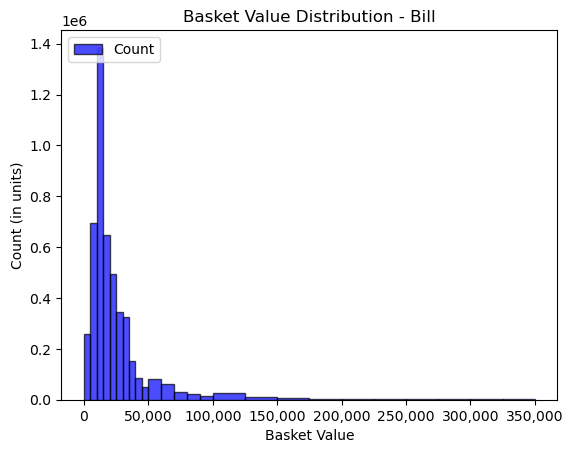

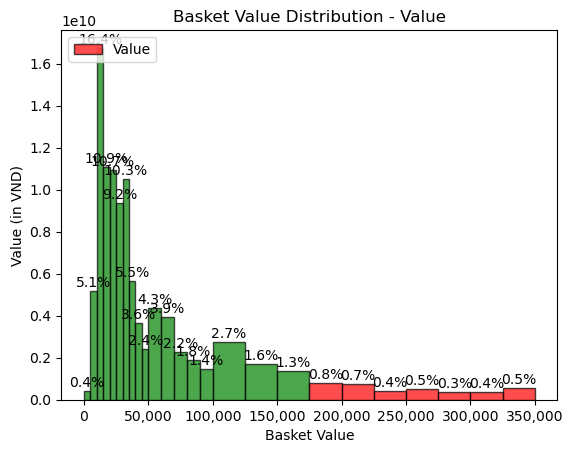

                    Count     Mean   Median         Value  %Value in total
Basket Value                                                              
0 to 4999          23,851    3,085    2,727  7.357336e+07         0.072101
5000 to 9999      198,994    7,859    8,182  1.563853e+09         1.532559
10000 to 14999    314,866   12,360   11,818  3.891599e+09         3.813726
15000 to 19999    241,347   17,679   18,182  4.266757e+09         4.181377
20000 to 24999    173,191   22,681   22,727  3.928213e+09         3.849608
25000 to 29999    198,450   27,529   27,273  5.463079e+09         5.353760
30000 to 34999    137,282   32,802   32,727  4.503172e+09         4.413061
35000 to 39999    127,078   37,483   37,273  4.763205e+09         4.667890
40000 to 44999     88,588   42,742   42,727  3.786402e+09         3.710634
45000 to 49999     88,145   47,526   47,273  4.189204e+09         4.105375
50000 to 59999    121,045   55,055   54,546  6.664119e+09         6.530766
60000 to 69999     88,921

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Calculate total value
total_value = grouped_data['Value'].sum()

# Add a new column for %Value in total
grouped_data['%Value in total'] = grouped_data['Value'] / total_value * 100

# Plot histogram for count
fig, ax1 = plt.subplots()
n, bins, patches = ax1.hist(df_filtered['Total Exclude VAT'], bins=bins, cumulative=False, alpha=0.7, color='blue', edgecolor='black')
ax1.set_xlabel('Basket Value')
ax1.set_ylabel('Count (in units)')
ax1.set_title('Basket Value Distribution - Bill')
ax1.legend(['Count'], loc='upper left')
ax1.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(int(x))))

# Plot histogram for value
fig, ax2 = plt.subplots()
n2, bins2, patches2 = ax2.hist(df_filtered['Total Exclude VAT'], bins=bins, cumulative=False, alpha=0.7, color='red', edgecolor='black', weights=df_filtered['Total Exclude VAT'])
ax2.set_xlabel('Basket Value')
ax2.set_ylabel('Value (in VND)')
ax2.set_title('Basket Value Distribution - Value')
ax2.legend(['Value'], loc='upper left')
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(int(x))))

# Add percentage value labels to the top of each column
for i in range(len(patches2)):
    height = patches2[i].get_height()
    percentage = height / total_value * 100
    ax2.annotate(f'{percentage:.1f}%', xy=(patches2[i].get_x() + patches2[i].get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center')

# Highlight columns with cumulative %Value in total up to 80%
cumulative_percentage = 0
for i, patch in enumerate(patches2):
    cumulative_percentage += grouped_data['%Value in total'].iloc[i]
    if cumulative_percentage <= 80:
        patch.set_fc('green')
    else:
        patch.set_fc('red')

plt.show()

# Display grouped data with additional column
grouped_data['Count'] = grouped_data['count'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Mean'] = grouped_data['mean'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Median'] = grouped_data['median'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Count x Mean'] = grouped_data['Value'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data = grouped_data[['Count', 'Mean', 'Median', 'Value', '%Value in total']]
print(grouped_data)

In [13]:
# grouped_data.to_csv('groupdataM3.csv')

In [14]:
# Apply string slicing to create new columns 'StorID' and 'BusinessDate'
group_by_invoice_filtered['StoreID'] = group_by_invoice_filtered['InvoiceID'].map(lambda x: x[:6])
group_by_invoice_filtered['BusinessDate'] = group_by_invoice_filtered['InvoiceID'].map(lambda x: x[8:14])

# Reorder the columns
group_by_invoice_filtered = group_by_invoice_filtered.reindex (columns=['InvoiceID','StoreID','BusinessDate','Barcode','Sum of Qty','Total Exclude VAT','SubCategory Name'])

# Show the first 5 rows
group_by_invoice_filtered.head(5)

C:\Users\Trieu Pham\AppData\Local\Temp\ipykernel_11132\4178495343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_by_invoice_filtered['StoreID'] = group_by_invoice_filtered['InvoiceID'].map(lambda x: x[:6])
C:\Users\Trieu Pham\AppData\Local\Temp\ipykernel_11132\4178495343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_by_invoice_filtered['BusinessDate'] = group_by_invoice_filtered['InvoiceID'].map(lambda x: x[8:14])


,InvoiceID,StoreID,BusinessDate,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
1,VN0001010103230001,VN0001,010323,2501031190329,1,18182.0,Cold Local Drinks
2,VN0001010103230002,VN0001,010323,"2703010000050, 2010904000035",2,54545.0,"Dried Noodles, Sandwich"
3,VN0001010103230003,VN0001,010323,"8936136162782, 8938503000017, 2010101000005, 8...",9,53636.0,"Energy Drinks Sub, Mineral water, Cup Of Ice, ..."
4,VN0001010103230004,VN0001,010323,"6942836701024, 6942836702403",4,118181.0,"Chocolate Bar, Chocolate Bar"
5,VN0001010103230005,VN0001,010323,8936094291302,1,31818.0,Import Beer Can


In [15]:
# Group by StoreID and aggregate by 'InvoiceID', 'Total Exclude VAT', 'Sum of Qty' and 'BusinessDate'
grouped_by_store_net = group_by_invoice_filtered.groupby('StoreID').agg({'InvoiceID': 'nunique','Total Exclude VAT': 'sum', 'Sum of Qty': 'sum', 'BusinessDate': 'nunique'})

# Calculate the ADS, ADQ and ASI
grouped_by_store_net['ADS'] = grouped_by_store_net['Total Exclude VAT'] / grouped_by_store_net['BusinessDate']
grouped_by_store_net['ADQ'] = grouped_by_store_net['Sum of Qty'] / grouped_by_store_net['BusinessDate']
grouped_by_store_net['ASI'] = grouped_by_store_net['Total Exclude VAT'] / grouped_by_store_net['Sum of Qty']
grouped_by_store_net['CUS'] = grouped_by_store_net['InvoiceID'] / grouped_by_store_net['BusinessDate']
grouped_by_store_net['BV'] = grouped_by_store_net['ADS'] / grouped_by_store_net['CUS']
grouped_by_store_net['Avg_Items_Per_Bill'] = grouped_by_store_net['ADQ'] / grouped_by_store_net['CUS']
# Reset the index to make 'StoreID' a regular column
grouped_by_store_net = grouped_by_store_net.reset_index()

grouped_by_store_net



,StoreID,InvoiceID,Total Exclude VAT,Sum of Qty,BusinessDate,ADS,ADQ,ASI,CUS,BV,Avg_Items_Per_Bill
0,VN0001,18214,786234811.0,48326,26,3.023980e+07,1858.692308,16269.395584,700.538462,43166.509883,2.653234
1,VN0002,18324,958000910.0,46587,26,3.684619e+07,1791.807692,20563.696095,704.769231,52281.210980,2.542403
2,VN0003,16839,786191464.0,44754,26,3.023813e+07,1721.307692,17566.954105,647.653846,46688.726409,2.657759
3,VN0004,20920,747029593.0,47589,23,3.247955e+07,2069.086957,15697.526592,909.565217,35708.871558,2.274809
4,VN0005,14168,646368621.0,37762,26,2.486033e+07,1452.384615,17116.906440,544.923077,45621.726496,2.665302
...,...,...,...,...,...,...,...,...,...,...,...
206,VN0234,7808,290135046.0,17890,26,1.115904e+07,688.076923,16217.721968,300.307692,37158.689293,2.291240
207,VN0235,8954,345764207.0,21056,26,1.329862e+07,809.846154,16421.172445,344.384615,38615.613916,2.351575
208,VN0236,6419,313167958.0,17430,26,1.204492e+07,670.384615,17967.180608,246.884615,48787.655086,2.715376
209,VN0237,5065,250569295.0,13646,26,9.637281e+06,524.846154,18362.105745,194.807692,49470.739388,2.694176


In [50]:
# Create a new column 'Basket Value' based on the column 'Total Exclude VAT'
group_by_invoice_filtered['Basket Value'] = pd.cut(group_by_invoice_filtered['Total Exclude VAT'], bins=bins, labels=labels)

# Create a new dataframe 'group_basket_store' = group_by_invoice_filtered
group_basket_store = group_by_invoice_filtered

# Apply string slicing to create new column 'StoreID'
group_basket_store['StoreID'] = group_basket_store['InvoiceID'].map(lambda x: x[:6])

# Keep only the columns 'InvoiceID', 'Sum of Qty', 'Total Exclude VAT', 'Basket Value' and 'StoreID'
group_basket_store = group_basket_store[['InvoiceID','Sum of Qty','Total Exclude VAT','Basket Value','StoreID']].reindex(columns=['Basket Value','StoreID','InvoiceID','Sum of Qty','Total Exclude VAT'])

# Group by 'Basket Value' and 'StoreID' and aggregate by 'Total Exclude VAT'
group_basket_store = group_basket_store.groupby(['Basket Value','StoreID']).agg({'Total Exclude VAT': ['count', 'mean', 'median']})

# Access columns using tuple indexing and compute 'Value' column
group_basket_store.loc[:, ('Total Exclude VAT','Value')] = group_basket_store[('Total Exclude VAT','count')] * group_basket_store[('Total Exclude VAT','mean')]

group_basket_store.reset_index(inplace=True)

group_basket_store

C:\Users\Trieu Pham\AppData\Local\Temp\ipykernel_11132\4201650936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_by_invoice_filtered['Basket Value'] = pd.cut(group_by_invoice_filtered['Total Exclude VAT'], bins=bins, labels=labels)
C:\Users\Trieu Pham\AppData\Local\Temp\ipykernel_11132\4201650936.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_basket_store['StoreID'] = group_basket_store['InvoiceID'].map(lambda x: x[:6])


Basket Value StoreID Total Exclude VAT                           \
                                      count           mean    median   
0       0 to 4999  VN0001               208    3094.096154    2727.0   
1       0 to 4999  VN0002               159    3311.496855    2727.0   
2       0 to 4999  VN0003               240    3273.304167    2727.0   
3       0 to 4999  VN0004               158    3325.329114    2727.0   
4       0 to 4999  VN0005               135    3252.200000    2727.0   
...           ...     ...               ...            ...       ...   
5481     >=350000  VN0234                21  533570.333333  461818.0   
5482     >=350000  VN0235                45  479767.866667  460824.0   
5483     >=350000  VN0236                27  451321.037037  402728.0   
5484     >=350000  VN0237                33  501937.090909  437272.0   
5485     >=350000  VN0239                81  484582.555556  438182.0   

                  
           Value  
0       643572.0  
1       526528.0  
2       785593.0  
3       525402.0  
4       439047.0  
...          ...  
5481  11204977.0  
5482  21589554.0  
5483  12185668.0  
5484  16563924.0  
5485  39251187.0  

[5486 rows x 6 columns]

In [ ]:
import numpy as np
from sklearn.linear_model import RANSACRegressor

# StoreID and BusinessDate added to the filter dataframe
df_filtered['InvoiceID'] = df_filtered['InvoiceID'].astype(str)
df_filtered['StoreID'] = df_filtered['InvoiceID'].apply(lambda x: x[:6])
df_filtered['BusinessDate'] = df_filtered['InvoiceID'].apply(lambda x: x[8:14])

# Group by Basket Value and StoreID and calculate count and mean
grouped_data_store = df_filtered.groupby(['InvoiceID', 'StoreID']).agg({'InvoiceID': 'count', 'Total Exclude VAT': 'mean'})
grouped_data_store.rename(columns={'InvoiceID': 'count', 'Total Exclude VAT': 'mean'}, inplace=True)
grouped_data_store.reset_index(inplace=True)

# Calculate the 'value' column as the product of 'mean' and 'count'
grouped_data_store['Value'] = grouped_data_store['mean'] * grouped_data_store['count']

# Drop rows with NaN or 0 values in 'mean' or 'Value' columns
grouped_data_store.dropna(subset=['mean', 'Value'], inplace=True)
grouped_data_store = grouped_data_store[(grouped_data_store['mean'] != 0) & (grouped_data_store['Value'] != 0)]

# Fit RANSAC Regression model to 'Value' and 'mean' columns
X = grouped_data_store[['Value']].values
y = grouped_data_store['mean'].values

regressor = RANSACRegressor()
regressor.fit(X, y)

# Predict the mean values using the fitted model
y_pred = regressor.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Set a threshold for identifying outliers
threshold = 1.5 * np.median(np.abs(residuals))

# Identify outliers based on residuals
outliers = grouped_data_store[residuals > threshold]

# Remove outliers from the grouped_data_store DataFrame
grouped_data_store_clean = grouped_data_store[residuals <= threshold]

# Show the cleaned grouped data columns
print(grouped_data_store_clean)


                  InvoiceID StoreID  count      mean     Value
0                     30153   30153      1  16364.00   16364.0
4        VN0001010103230003  VN0001      4  13409.00   53636.0
9        VN0001010103230009  VN0001      1   9091.00    9091.0
10       VN0001010103230010  VN0001      1  11818.00   11818.0
11       VN0001010103230011  VN0001      2  13636.50   27273.0
...                     ...     ...    ...       ...       ...
2569969  VN0239023103230472  VN0239      3  10000.00   30000.0
2569971  VN0239023103230474  VN0239      1  11818.00   11818.0
2569974  VN0239023103230477  VN0239     11  23223.00  255453.0
2569975  VN0239023103230478  VN0239      4  27727.25  110909.0
2569976  VN0239023103230479  VN0239      1  12727.00   12727.0

[1714180 rows x 5 columns]


In [ ]:
import numpy as np

# Sort the 'grouped_data_store' DataFrame by the 'value' column in descending order
grouped_data_store.sort_values('Value', ascending=False, inplace=True)

# Calculate the cumulative sum of the 'value' column
grouped_data_store['cumulative_sum'] = grouped_data_store['Value'].cumsum()

# Calculate the cumulative distribution percentage
grouped_data_store['cumulative_percentage'] = grouped_data_store['cumulative_sum'] / grouped_data_store['Value'].sum()

# Filter rows where the cumulative percentage is less than or equal to 0.8
filtered_data = grouped_data_store[grouped_data_store['cumulative_percentage'] >= 0.8]

# Print the filtered results
print(filtered_data)

                  InvoiceID StoreID  count     mean    Value  cumulative_sum  \
1097353  VN0098021503230199  VN0098      1  31818.0  31818.0    9.620183e+10   
887717   VN0082011503230148  VN0082      2  15909.0  31818.0    9.620186e+10   
310052   VN0027021403230432  VN0027      1  31818.0  31818.0    9.620189e+10   
97513    VN0005021603230510  VN0005      1  31818.0  31818.0    9.620192e+10   
97815    VN0005021703230287  VN0005      3  10606.0  31818.0    9.620195e+10   
...                     ...     ...    ...      ...      ...             ...   
258348   VN0022011803230093  VN0022      1   1464.0   1464.0    1.202523e+11   
2524916  VN0234022003230247  VN0234      1      5.0      5.0    1.202523e+11   
2344096  VN0213011603230079  VN0213      1      2.0      2.0    1.202523e+11   
2523202  VN0234021403230305  VN0234      1      2.0      2.0    1.202523e+11   
1803688  VN0164012203230113  VN0164      1      1.0      1.0    1.202523e+11   

         cumulative_percentage  
109735